- ___Nama  : RYSTON GALATIANS SIHOMBING___
- ___Nim   : 09011381722098___
- ___Kelas : SK5___ 

# Breast Cancer Wisconsin (Diagnostic) 

Pendahuluan : Dalam Project UAS ini,Saya menggambarkan karakteristik inti sel yang ada dalam gambar ganas dan jinak. 
              dalam ruang 3 dimensi adalah yang dijelaskan dalam: KP Bennett dan OL Mangasarian: "Diskriminasi Pemrograman                   Linier yang Kuat dari Dua Set yang Tidak Terpisahkan Linier dan Metode Optimasi dan Perangkat Lunak"

# 1. Pre-Processing Dataset

• Memuat Dataset
Ada sejumlah alat dan metode yang berbeda yang dapat digunakan untuk preprocessing, contohnya yaitu : transformasi yang memanipulasi data mentah untuk menghasilkan satu input, denoising yang menghilangkan noise dari data, dan lain sebagainya. MinMaxScaler itu memanipulasi sedemikian rupa sehingga menjadi data yang bernilai dari ranges 0 sampai 1.

In [1]:
#Import Library
import sys
import scipy
import numpy
import matplotlib
import pandas # Library untuk pengolahan data
import sklearn 

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

#Import Dataset
df = pd.read_csv("C:\\Users\ACER\Downloads\data.csv")

print(df.shape) 

(569, 33)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

Penggambaran dataset

In [3]:
# Describe the dataset
df.drop(['id'], axis=1, inplace=True)
df.drop(['Unnamed: 32'], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Jadi saya memiliki total 31 kolom

Plot histogram untuk setiap variabel

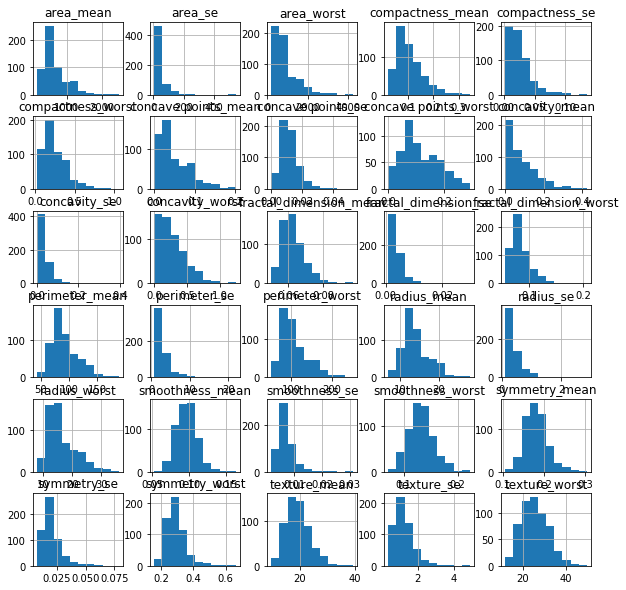

In [4]:
# Plot histograms for each variable
df.hist(figsize = (10, 10))
plt.show()

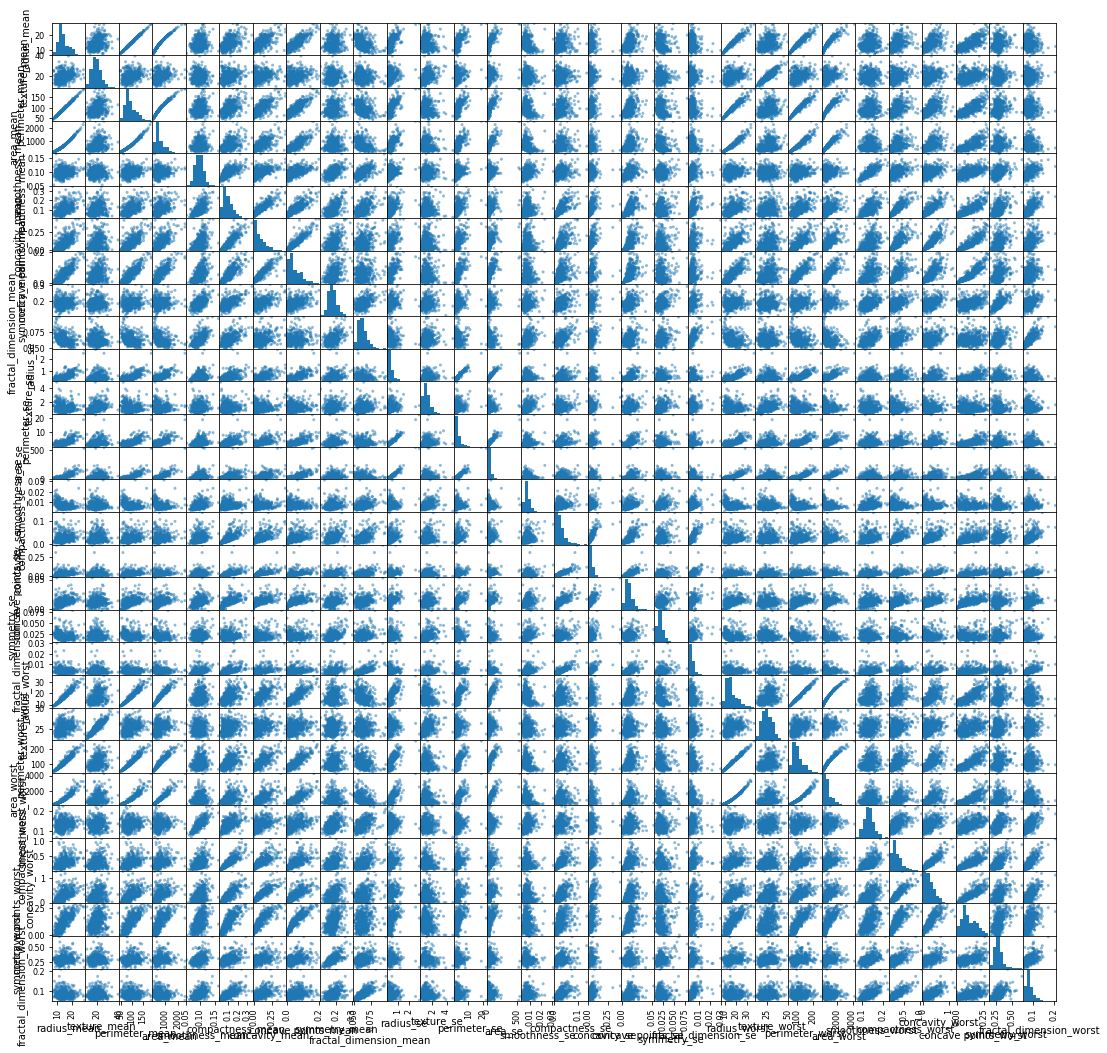

In [5]:
# Create scatter plot matrix
scatter_matrix(df, figsize = (18,18))
plt.show()

### - Normalisasi atau preprocessing data.  
Normalisasi disini merupakan penskalaan nilai atribut dari data sehingga bisa jatuh pada range tertentu. Metode normalisasi yang digunakan yaitu Min Max, Metode Min-Max merupakan metode normalisasi dengan melakukan transformasi linier terhadap data asli.

In [6]:
# Create X and Y datasets for training
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 2. Mempersiapkan ANN

Membangun lapisan
Mari kita membangun Layers

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization
import keras
from keras.layers import Input, Dense
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(256, input_dim=30))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('softmax'))
model.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Using TensorFlow backend.
C:\Users\ACER\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ACER\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ACER\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ACER\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`


Train on 455 samples, validate on 114 samples
Epoch 1/20
455/455 [==============================] - 2s 5ms/step - loss: 0.6872 - acc: 0.8220 - val_loss: 0.6777 - val_acc: 0.8947
Epoch 2/20
455/455 [==============================] - 0s 231us/step - loss: 0.6727 - acc: 0.9055 - val_loss: 0.6621 - val_acc: 0.9474
Epoch 3/20
455/455 [==============================] - 0s 230us/step - loss: 0.6578 - acc: 0.9407 - val_loss: 0.6503 - val_acc: 0.9386
Epoch 4/20
455/455 [==============================] - 0s 220us/step - loss: 0.6445 - acc: 0.9604 - val_loss: 0.6394 - val_acc: 0.9561
Epoch 5/20
455/455 [==============================] - 0s 236us/step - loss: 0.6319 - acc: 0.9648 - val_loss: 0.6293 - val_acc: 0.9561
Epoch 6/20
455/455 [==============================] - 0s 246us/step - loss: 0.6208 - acc: 0.9714 - val_loss: 0.6200 - val_acc: 0.9649
Epoch 7/20
455/455 [==============================] - 0s 216us/step - loss: 0.6101 - acc: 0.9758 - val_loss: 0.6100 - val_acc: 0.9649
Epoch 8/20
455/455

# 3. Membuat Prediksi

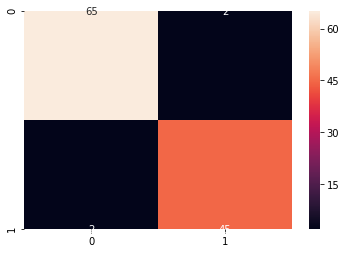

In [8]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [9]:
# Testing Options
seed = 8
scoring = 'accuracy'

# Define models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.967053 (0.022492)
SVM: 0.975894 (0.024847)


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

In [10]:
# Make predictions on validation dataset

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))
    
# Accuracy - ratio of correctly predicted observation to the total observations. 
# Precision - (false positives) ratio of correctly predicted positive observations to the total predicted positive observations
# Recall (Sensitivity) - (false negatives) ratio of correctly predicted positive observations to the all observations in actual class - yes.
# F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false 


KNN
0.956140350877193
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        67
           1       1.00      0.89      0.94        47

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

SVM
0.9824561403508771
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [11]:
clf = SVC()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9824561403508771


Setelah menjalankan sel di atas, saya mendapat hasil berikut

    best_parameters: {'batch_size': 1, 'epochs': 100, 'optimizer': 'rmsprop'}

    best_accuracy: 0.978021978022